In [ ]:
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *
import pandas as pd

/Users/mugetronblue/opt/anaconda3/envs/species-id/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/mugetronblue/opt/anaconda3/envs/species-id/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/mugetronblue/opt/anaconda3/envs/species-id/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [ ]:
import torch

print(torch.__version__)
print(torch)

1.11.0
<module 'torch' from '/Users/mugetronblue/opt/anaconda3/envs/species-id/lib/python3.7/site-packages/torch/__init__.py'>


## Running Moment to Moment Labeling System on a Directory of WAV Files 

In [ ]:
path = "./TEST/"
tweety_output=True

### Dictionary that defines the isolation technique and parameters used to generate automated labels 

In [ ]:
isolation_parameters = {
    "technique" : "steinberg",
    "threshold_type" : "median",
    "threshold_const" : 1.0,
    "threshold_min" : 0.01,
    "window_size" : 0.2,
    "chunk_size" : 0.2
}

In [ ]:
automated_df = generate_automated_labels_tweetynet(path,isolation_parameters, tweety_output=tweety_output, normalize_local_scores=True); #make this function work with tweetynet
# need a better way to generate our output. 

[array([0, 0, 0, ..., 0, 0, 0])]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -2.239635
1    0_f     0      0   0.023256    -4.239987
2    0_f     0      0   0.046512    -5.902113
3    0_f     0      0   0.069767    -6.171492
4    0_f     0      0   0.093023    -5.241902
..   ...   ...    ...        ...          ...
81  11_f     0      0  23.883721    -0.480680
82  11_f     0      0  23.906977    -1.271922
83  11_f     0      0  23.930233    -0.973318
84  11_f     0      0  23.953488    -0.829073
85  11_f     0      0  23.976744    -0.131584

[1032 rows x 5 columns]
here Aburria-aburri-257423.wav
saved_csv
[array([0, 0, 0, ..., 0, 0, 0])]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -2.339295
1    0_f     0      0   0.023256    -2.641006
2    0_f     0      0   0.046512    -3.096580
3    0_f     0      0   0.069767    -2.497246
4    0_f     0      0   0.093023    -2.466060
..   ...   ...    ...        ...        

### Pandas Ouput of Automated Labeling 

In [ ]:
automated_df

,OFFSET,DURATION,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,MANUAL ID
0,2.348837,3.255814,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
1,6.860465,1.837209,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
2,11.953488,0.046512,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
3,15.604651,0.046512,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
4,19.255814,3.441860,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
...,...,...,...,...,...,...,...,...
231,4.069767,0.046512,./TEST/,ScreamingPiha4.wav,0,13.557551,44100,bird
232,4.186047,0.116279,./TEST/,ScreamingPiha4.wav,0,13.557551,44100,bird
233,8.930233,1.069767,./TEST/,ScreamingPiha4.wav,0,13.557551,44100,bird
234,10.186047,0.906977,./TEST/,ScreamingPiha4.wav,0,13.557551,44100,bird


### Function that gathers statistics about the duration of annotations

In [ ]:
annotation_duration_statistics(automated_df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,236,0.05,1.176882,6.105711,0.046512,0.110465,0.337209,0.947674,88.0


### Human Manual Labels for Comparison 

In [ ]:
manual_df = pd.read_csv("ScreamingPiha_Manual_Labels.csv")
#manual_df = pd.read_csv("BirdCLEF2020_Validation.csv")
manual_df

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLING RATE,MANUAL ID
0,./TEST/,ScreamingPiha1.wav,32.6160,0,1.5448,2.1297,16000,bird
1,./TEST/,ScreamingPiha1.wav,32.6160,0,10.1638,0.8498,16000,bird
2,./TEST/,ScreamingPiha1.wav,32.6160,0,0.5549,0.9999,16000,bird
3,./TEST/,ScreamingPiha1.wav,32.6160,0,8.7739,0.8399,16000,bird
4,./TEST/,ScreamingPiha1.wav,32.6160,0,12.6335,1.9997,16000,bird
...,...,...,...,...,...,...,...,...
249,./TEST/,ScreamingPiha2.wav,33.9331,0,26.9274,1.7602,44100,bird
250,./TEST/,ScreamingPiha2.wav,33.9331,0,30.8178,0.7200,44100,bird
251,./TEST/,ScreamingPiha2.wav,33.9331,0,29.8677,0.9401,44100,bird
252,./TEST/,ScreamingPiha2.wav,33.9331,0,31.5378,1.9502,44100,bird


In [ ]:
annotation_duration_statistics(manual_df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,254,1.87,1.068224,0.664488,0.11,0.532475,0.78005,1.767475,3.1199


### Histogram Visualization of Annotation Lengths

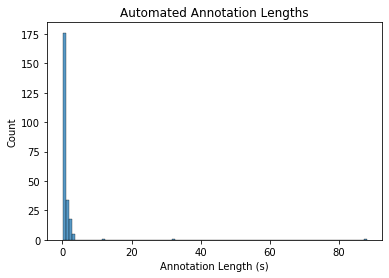

In [ ]:
annotation_duration_histogram(automated_df, n_bins = 100, title = "Automated Annotation Lengths")

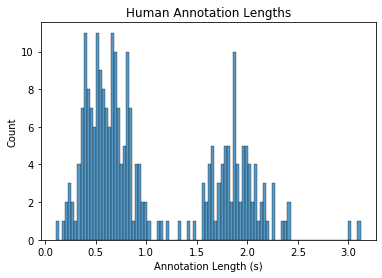

In [ ]:
annotation_duration_histogram(manual_df, n_bins = 100, title = "Human Annotation Lengths")
# In the Screaming Piha clips we can see two distinct clusters based on the "Whoa" vocalizations (.25-1.25s)
# and the "Pee-Haw" vocalizations (1.25-2.5s)

### Helper function to convert to kaleidoscope-compatible format 

In [ ]:
kaleidoscope_conversion(manual_df)

,FOLDER,IN FILE,CHANNEL,OFFSET,DURATION,MANUAL ID
0,./TEST,ScreamingPiha1.wav,0,1.5448,2.1297,bird
1,./TEST,ScreamingPiha1.wav,0,10.1638,0.8498,bird
2,./TEST,ScreamingPiha1.wav,0,0.5549,0.9999,bird
3,./TEST,ScreamingPiha1.wav,0,8.7739,0.8399,bird
4,./TEST,ScreamingPiha1.wav,0,12.6335,1.9997,bird
...,...,...,...,...,...,...
249,./TEST,ScreamingPiha2.wav,0,26.9274,1.7602,bird
250,./TEST,ScreamingPiha2.wav,0,30.8178,0.7200,bird
251,./TEST,ScreamingPiha2.wav,0,29.8677,0.9401,bird
252,./TEST,ScreamingPiha2.wav,0,31.5378,1.9502,bird


## Different Combinations of Local Score Visualization Graphs

### Baseline Graph without any annotations

No handles with labels found to put in legend.


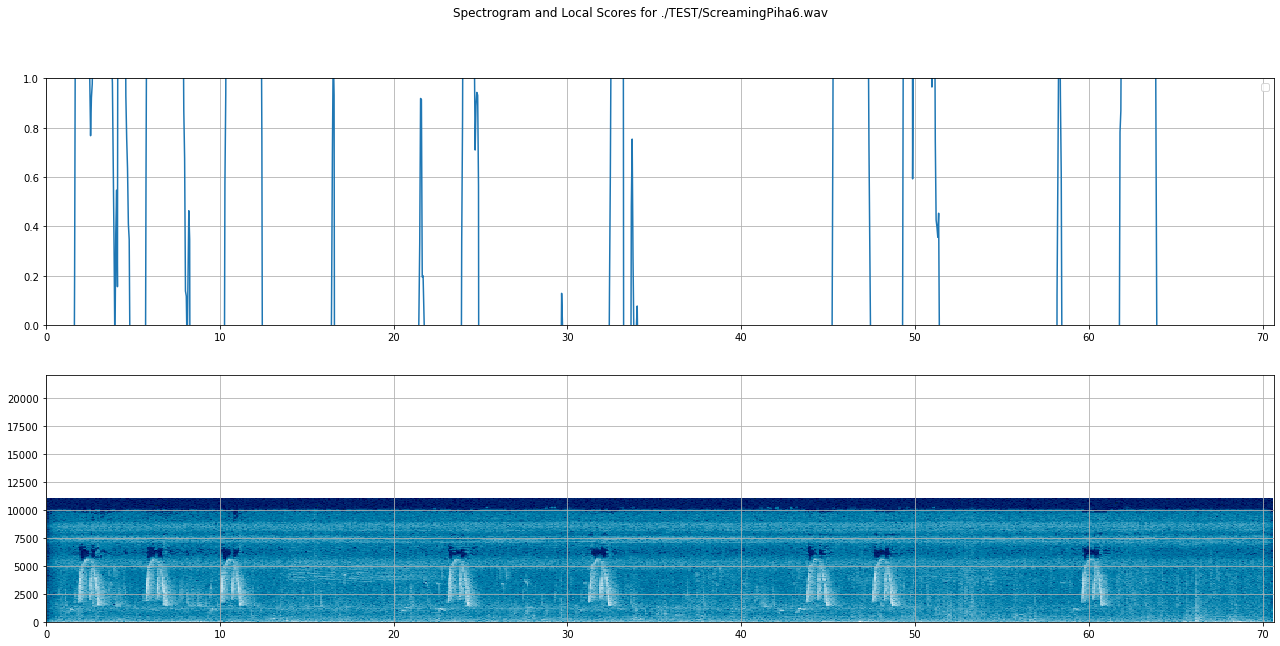

In [ ]:
clip_path = "./TEST/ScreamingPiha6.wav"
local_score_visualization(clip_path, tweety_output=tweety_output)

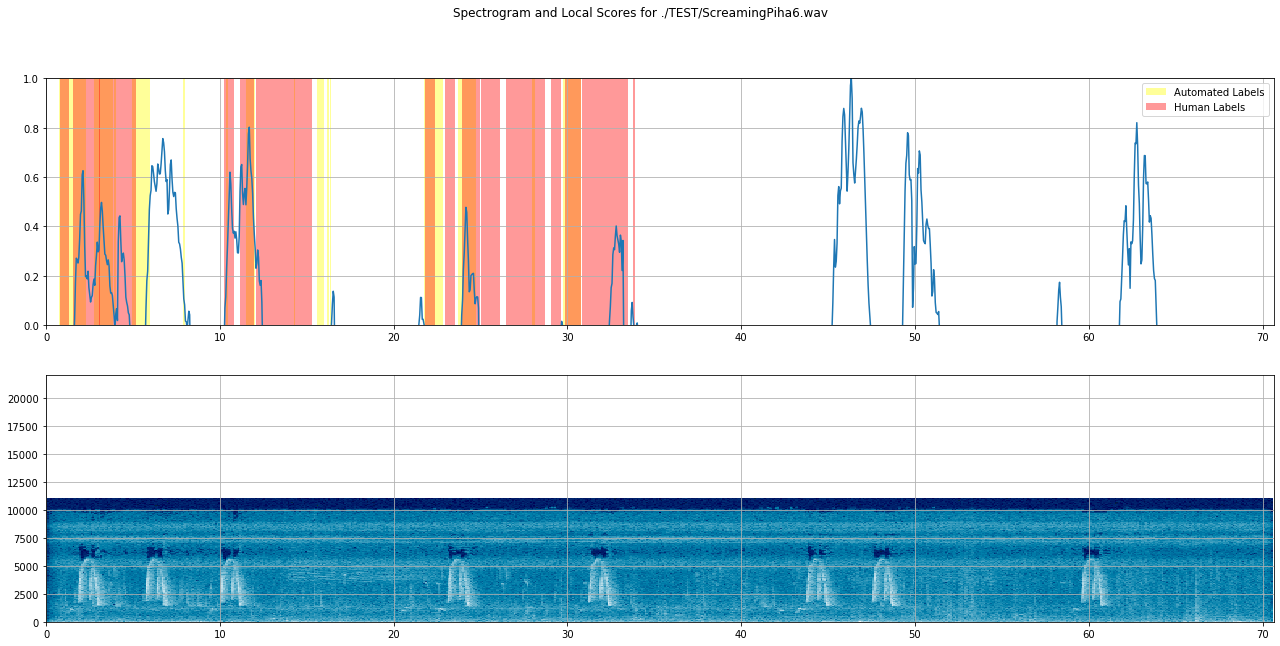

In [ ]:
local_score_visualization(clip_path,automated_df = True, normalize_local_scores = True, isolation_parameters=isolation_parameters,tweety_output=tweety_output, premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"])

### Baseline graph with log scale

No handles with labels found to put in legend.


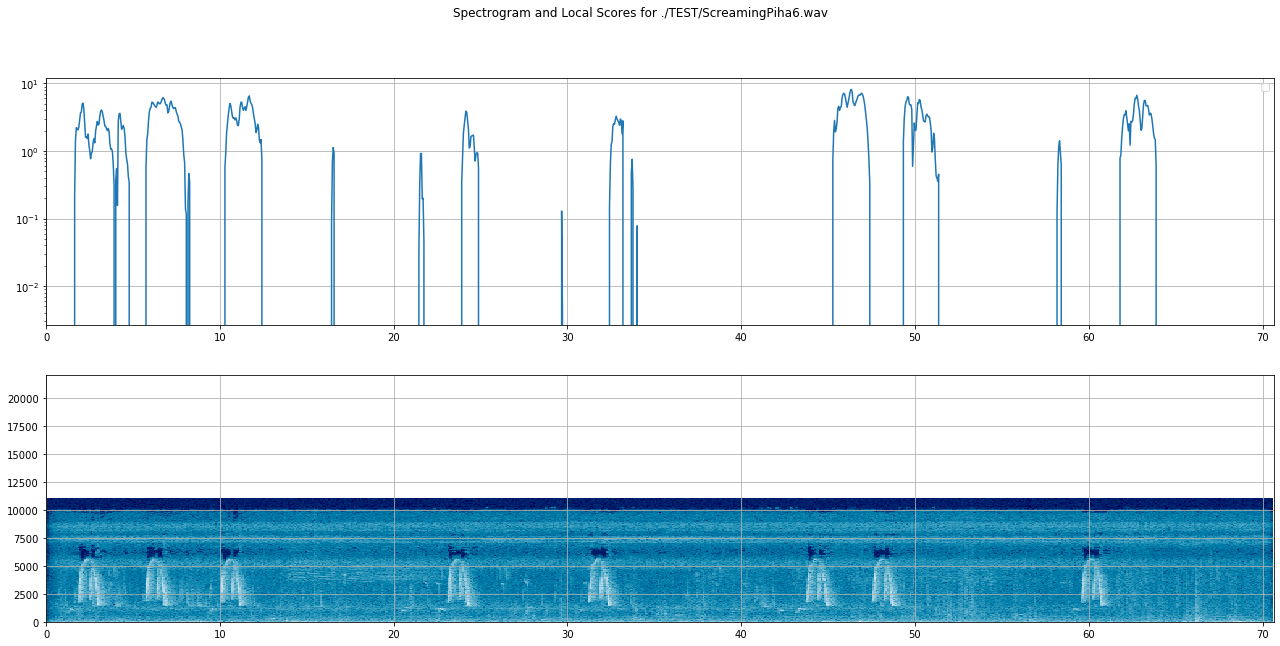

In [ ]:
local_score_visualization(clip_path,log_scale = True, tweety_output=tweety_output)

### Baseline graph with normalized local score values between [0,1] 

No handles with labels found to put in legend.


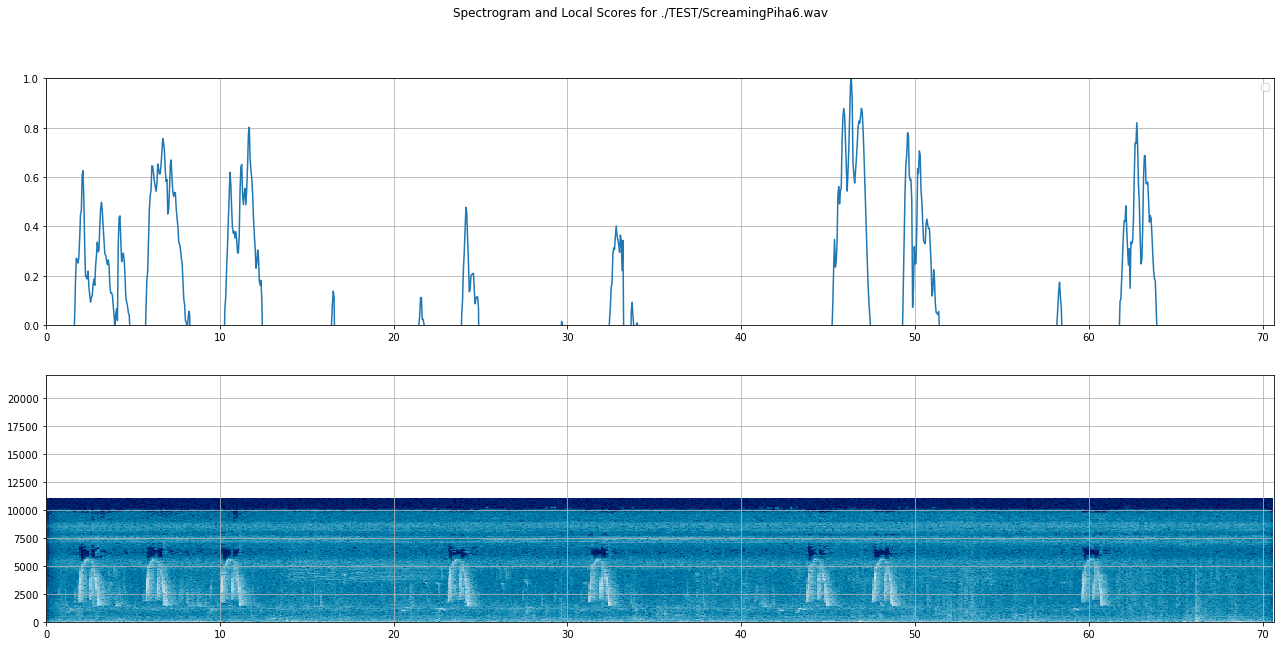

In [ ]:
local_score_visualization(clip_path, normalize_local_scores = True, tweety_output=tweety_output)

### Graph with Automated Labeling 

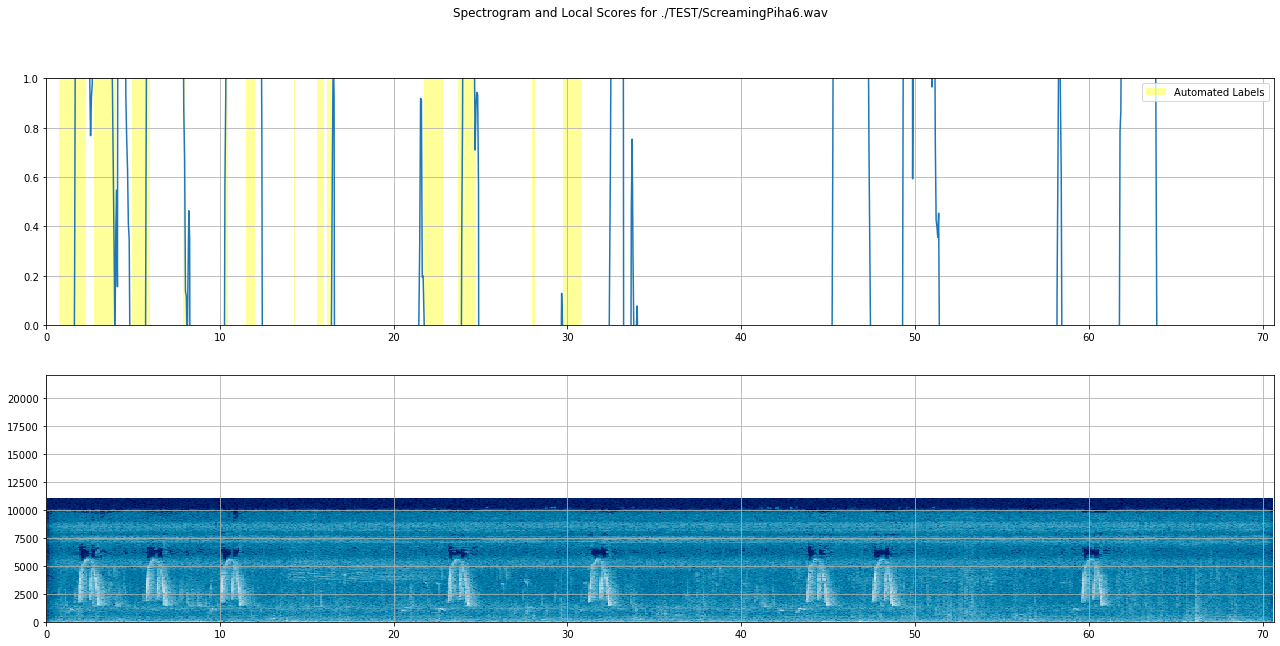

In [ ]:
local_score_visualization(clip_path,automated_df = True, isolation_parameters = isolation_parameters, tweety_output=tweety_output)

### Graph with Human Labelling

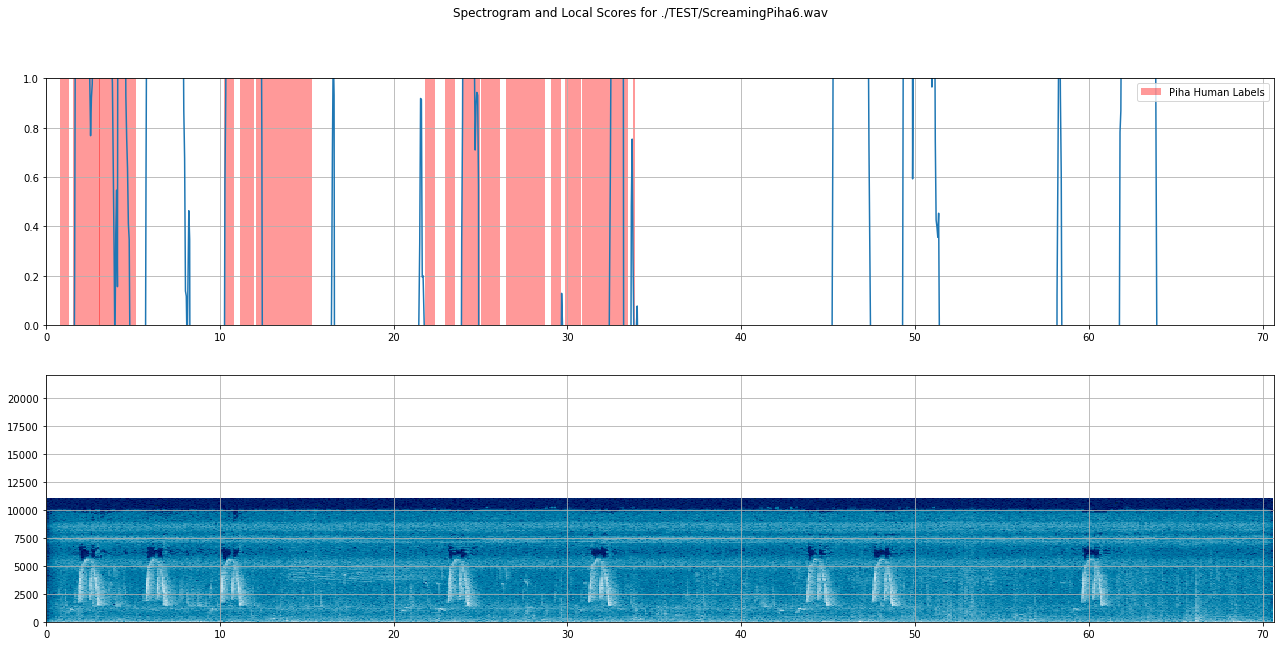

In [ ]:
local_score_visualization(clip_path, tweety_output=tweety_output, premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"],premade_annotations_label = "Piha Human Labels")

### Graph with Both Automated and Human Labels 
    Orange ==> True Positive
    Red ==> False Negative
    Yellow ==> False Positive
    White ==> True Negative

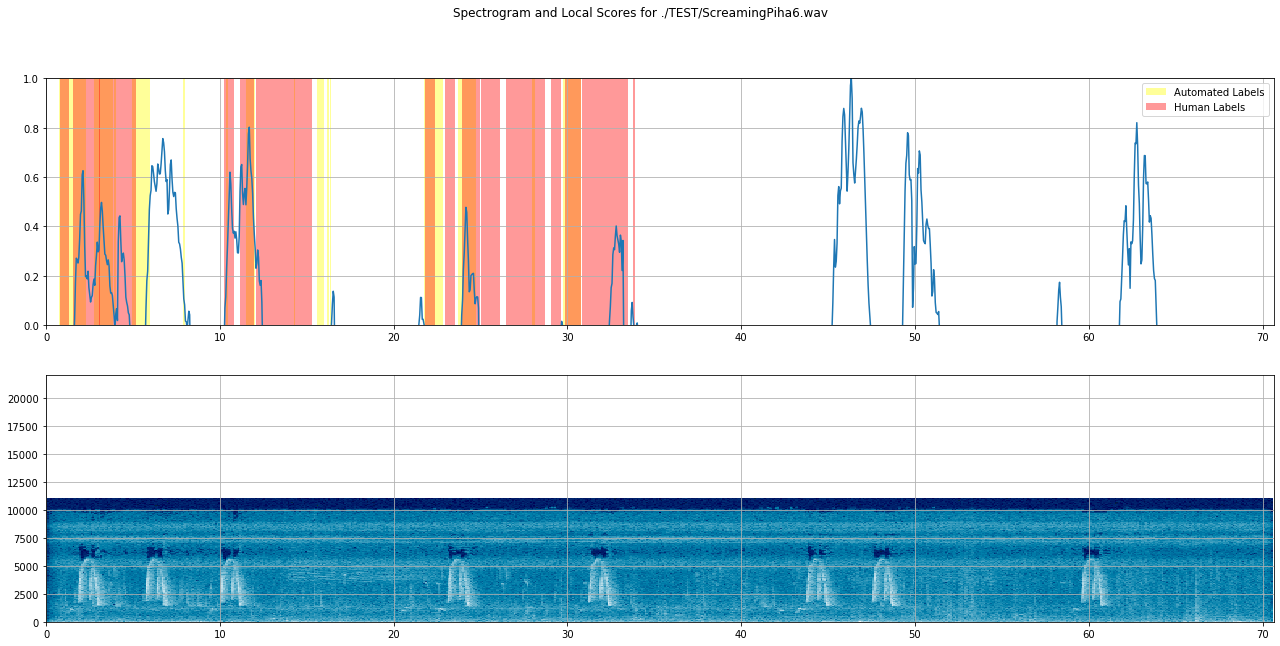

In [ ]:
local_score_visualization(clip_path,automated_df = True, normalize_local_scores = True, isolation_parameters=isolation_parameters,tweety_output=tweety_output, premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"])

In [ ]:
clip_path_2 = "TEST/Aburria-aburri-257423.wav"
manual_df_2 = pd.read_csv("for_data_science_newline_fixed.csv")


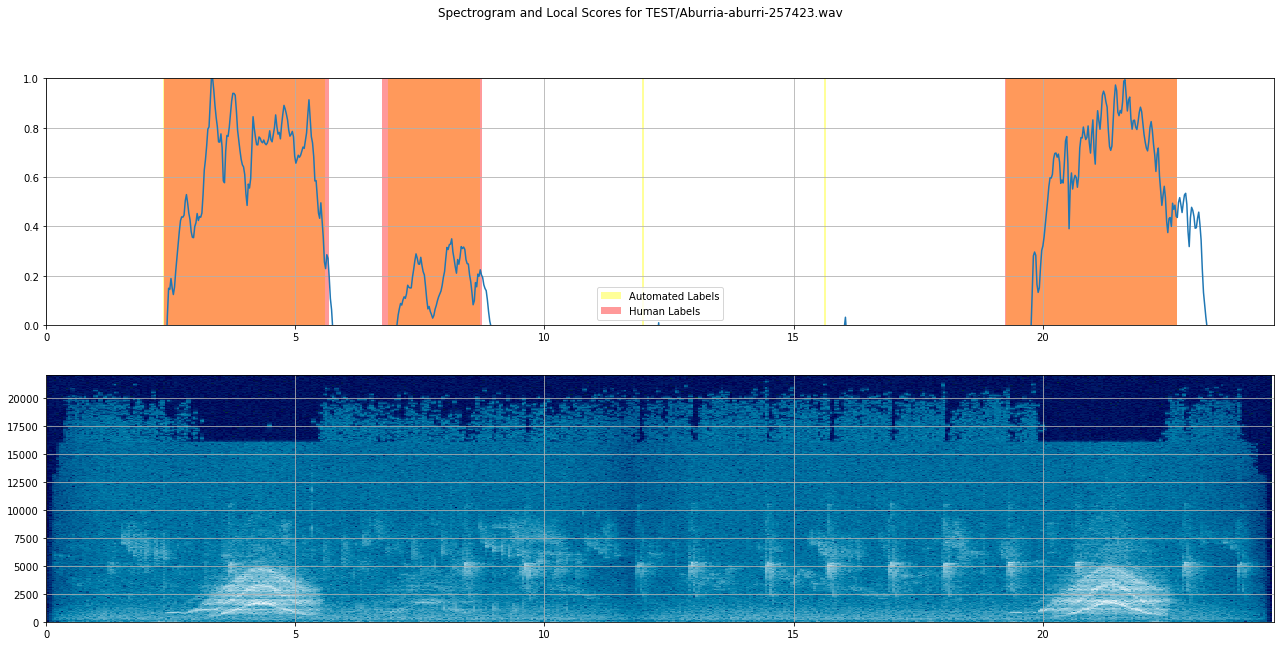

In [ ]:
local_score_visualization(clip_path_2,automated_df = True, normalize_local_scores = True, isolation_parameters=isolation_parameters,tweety_output=tweety_output, premade_annotations_df = manual_df_2[manual_df_2["IN FILE"] == "Aburria-aburri-257423.wav"])

### Another Visualization of True Positives, False Positives, False Negatives, and True Negatives 

In [ ]:
automated_df


,OFFSET,DURATION,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,MANUAL ID
0,2.348837,3.255814,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
1,6.860465,1.837209,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
2,11.953488,0.046512,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
3,15.604651,0.046512,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
4,19.255814,3.441860,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
...,...,...,...,...,...,...,...,...
231,4.069767,0.046512,./TEST/,ScreamingPiha4.wav,0,13.557551,44100,bird
232,4.186047,0.116279,./TEST/,ScreamingPiha4.wav,0,13.557551,44100,bird
233,8.930233,1.069767,./TEST/,ScreamingPiha4.wav,0,13.557551,44100,bird
234,10.186047,0.906977,./TEST/,ScreamingPiha4.wav,0,13.557551,44100,bird


In [ ]:
automated_df[automated_df["IN FILE"] == "Aburria-aburri-257423.wav"]

,OFFSET,DURATION,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,MANUAL ID
0,2.348837,3.255814,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
1,6.860465,1.837209,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
2,11.953488,0.046512,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
3,15.604651,0.046512,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
4,19.255814,3.441860,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird


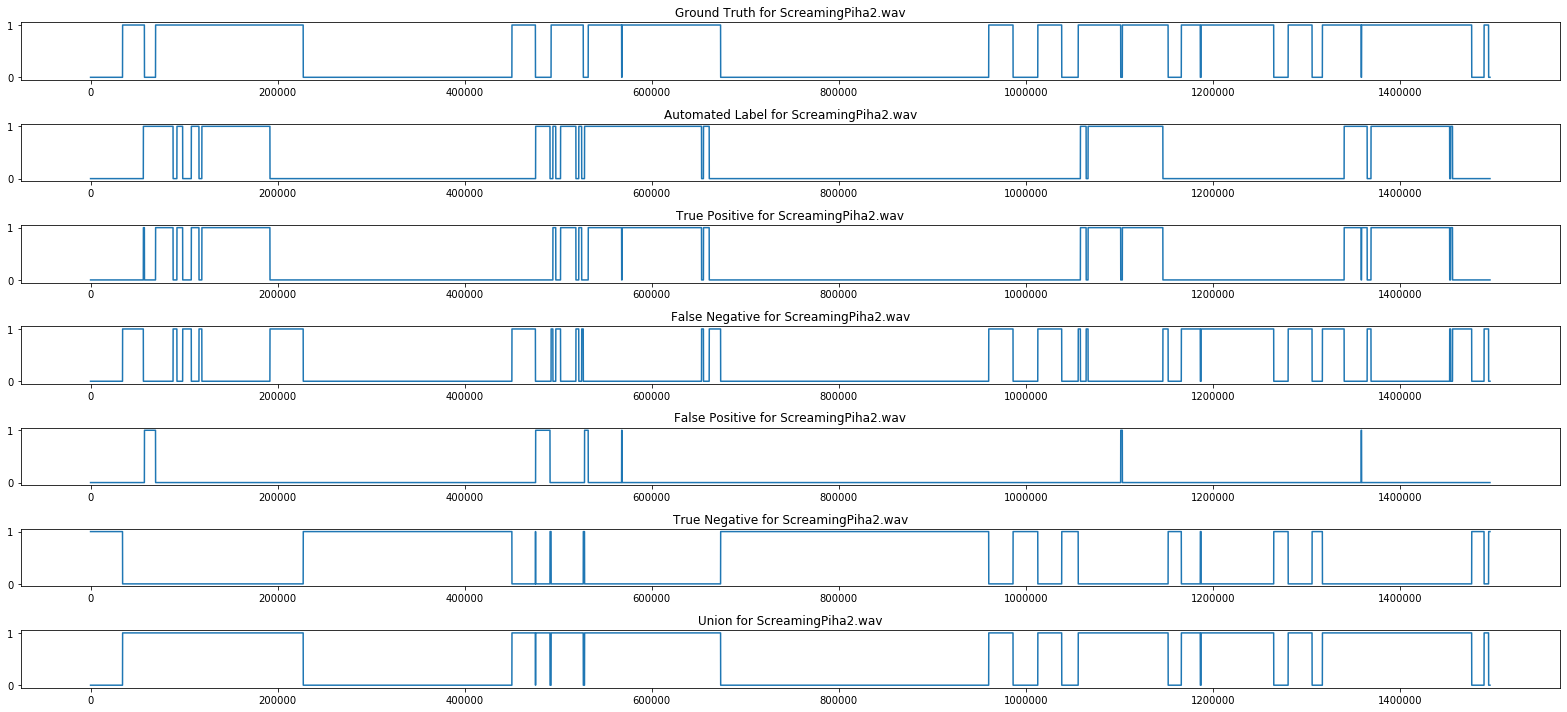

In [ ]:
automated_piha_df = automated_df[automated_df["IN FILE"] == "ScreamingPiha2.wav"]
manual_piha_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"]
piha_stats = plot_bird_label_scores(automated_piha_df,manual_piha_df)

### Function that generates statistics to gauge efficacy of automated labeling compared to human labels 

In [ ]:
statistics_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "general");
statistics_df

Something went wrong with: Aburria-aburri-257423.wav


,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE POSITIVE,FALSE NEGATIVE,TRUE NEGATIVE,UNION,PRECISION,RECALL,F1,Global IoU
0,./TEST/,ScreamingPiha9.wav,bird,17.479751,2.357438,11.112676,6.352993,30.949864,0.881161,0.611342,0.721862,0.564776
1,./TEST/,ScreamingPiha8.wav,bird,1.046508,3.883719,5.853583,33.337007,10.783810,0.212264,0.151666,0.176920,0.097044
2,./TEST/,ScreamingPiha10.wav,bird,26.036213,5.025737,13.345079,45.375828,44.407029,0.838203,0.661132,0.739211,0.586308
3,./TEST/,ScreamingPiha1.wav,bird,4.961497,2.189388,9.326712,16.138390,16.477596,0.693830,0.347244,0.462846,0.301106
4,./TEST/,ScreamingPiha11.wav,bird,20.284195,5.576372,17.533175,20.501769,43.393741,0.784368,0.536372,0.637087,0.467445
5,./TEST/,ScreamingPiha3.wav,bird,2.093039,0.000000,2.362653,2.388390,4.455692,1.000000,0.469745,0.639220,0.469745
6,./TEST/,ScreamingPiha2.wav,bird,10.231837,0.768186,8.259887,14.673152,19.259909,0.930165,0.553320,0.693878,0.531251
7,./TEST/,ScreamingPiha6.wav,bird,12.783764,0.216281,12.074490,45.560544,25.074535,0.983363,0.514266,0.675348,0.509831
8,./TEST/,ScreamingPiha7.wav,bird,10.384376,6.336576,41.245828,75.623424,57.966780,0.621040,0.201130,0.303854,0.179144
9,./TEST/,ScreamingPiha5.wav,bird,6.558118,0.000000,28.740522,18.879320,35.298639,1.000000,0.185790,0.313360,0.185790


### Function that takes the statistical ouput of all of the clips and gets the equivalent global scores 

In [ ]:
global_dataset_statistics(statistics_df)

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.79432,0.42836,0.556572,0.385591


### Function that takes in the manual and automated labels for a clip and outputs human label-by-label IoU Scores. Used to derive statistics that measure how well a system is isolating desired segments of audio clips

In [ ]:
Intersection_over_Union_Matrix = clip_IoU(automated_piha_df,manual_piha_df)
print(Intersection_over_Union_Matrix)

[[0.     0.     0.2862 0.1963 0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.5263 0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.    ]
 [0.0213 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.    ]
 [0.3707 0.1642 0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.0894 0.477  0.0894 0.     0.
  0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.2855 0.
  0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.2115 0.
  0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.

### Function that turns the IoU Matrix of a clip into true positive and false positives values, as well as computing the precision, recall, and F1 statistics

In [ ]:
matrix_IoU_Scores(Intersection_over_Union_Matrix,manual_piha_df,0.5)

,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,./TEST/,ScreamingPiha2.wav,bird,3,17,12,0.2,0.15,0.1714


### Wrapper function that takes matrix_IoU_Scores across multiple clips. Allows user to modify the threshold that determines whether or not a label is a true positive.

In [ ]:
stats_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "IoU",threshold = 0.5)
stats_df

Something went wrong with: Aburria-aburri-257423.wav
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha8.wav
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha4.wav


,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,./TEST/,ScreamingPiha9.wav,bird,9,14,20,0.3103,0.3913,0.3461
1,./TEST/,ScreamingPiha8.wav,bird,0,9,12,0.0000,0.0000,0.0000
2,./TEST/,ScreamingPiha10.wav,bird,13,27,20,0.3939,0.3250,0.3561
3,./TEST/,ScreamingPiha1.wav,bird,3,10,7,0.3000,0.2308,0.2609
4,./TEST/,ScreamingPiha11.wav,bird,11,24,30,0.2683,0.3143,0.2895
5,./TEST/,ScreamingPiha3.wav,bird,1,5,4,0.2000,0.1667,0.1818
6,./TEST/,ScreamingPiha2.wav,bird,3,17,12,0.2000,0.1500,0.1714
7,./TEST/,ScreamingPiha6.wav,bird,8,11,3,0.7273,0.4211,0.5334
8,./TEST/,ScreamingPiha7.wav,bird,6,45,49,0.1091,0.1176,0.1132
9,./TEST/,ScreamingPiha5.wav,bird,3,27,8,0.2727,0.1000,0.1463


### Function that takes the output of dataset_IoU Statistics and ouputs a global count of true positives and false positives, as well as computing common metrics across the dataset

In [ ]:
global_stats_df = global_IoU_Statistics(stats_df)
global_stats_df

,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,bird,57,197,174,0.2468,0.2244,0.2351
